In [1]:
import sys
!sudo add-apt-repository ppa:saiarcot895/chromium-beta
!sudo apt remove chromium-browser
!sudo snap remove chromium
!sudo apt install chromium-browser
!pip3 install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

PPA publishes dbgsym, you may need to include 'main/debug' component
Repository: 'deb https://ppa.launchpadcontent.net/saiarcot895/chromium-beta/ubuntu/ jammy main'
Description:
This PPA contains the latest Chromium Beta builds, with hardware video decoding enabled (hidden behind a flag), and support for Widevine (needed for viewing many DRM-protected videos) enabled.

== Hardware Video Decoding ==

To enable hardware video decoding, start Chromium with the --enable-features=VaapiVideoDecoder argument. To make this persistent, create a file at /etc/chromium-browser/customizations/92-vaapi-hardware-decoding with the following contents:

CHROMIUM_FLAGS="${CHROMIUM_FLAGS} --enable-features=VaapiVideoDecoder"

See also https://wiki.archlinux.org/title/Chromium#Hardware_video_acceleration for more information on VAAPI video decoding support.

=== Widevine Support ===

The packages in this PPA have support for Widevine inside Chromium enabled. However, you still need to copy some files from 

In [3]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
webdriver_service = Service('/usr/bin/chromedriver')
driver = webdriver.Chrome(service = webdriver_service, options=options)
url = 'https://www.molit.go.kr/USR/NEWS/m_71/lst.jsp'
driver.get(url)

In [5]:
columns = ['순위', '기사 제목', '분류', '기사 작성일']
rank = []
title = []
journal = []
date = []
for i in range(1, 11):
    rank.append(i)
    title.append(driver.find_element(By.CSS_SELECTOR, f"#cont-body > table > tbody > tr:nth-child({i}) > td.bd_title > a").text)
    journal.append(driver.find_element(By.XPATH, f'/html/body/div[3]/section/div[2]/article/table/tbody/tr[{i}]/td[3]').text)
    date.append(driver.find_element(By.XPATH, f'/html/body/div[3]/section/div[2]/article/table/tbody/tr[{i}]/td[4]').text)

In [8]:
import pandas as pd
df = pd.DataFrame({columns[0]: rank,
columns[1]: title,
columns[2]: journal,
columns[3]: date}, columns=columns)
df.head()

,순위,기사 제목,분류,기사 작성일
0,1,지방 준공 후 미분양 주택 3천호 매입 개시,주택토지,2025-03-20
1,2,「주택시장 안정화 방안」 발표,주택토지,2025-03-19
2,3,부동산 PF 상황 점검회의 개최,건설,2025-03-19
3,4,성남~복정 광역 BRT 구축사업 (성남S-BRT 1단계 산성대로) 실시계획 승인,교통물류,2025-03-19
4,5,"도심 속 새로운 변화, 장위12구역 도심 공공주택 복합지구 지정",주택토지,2025-03-19


In [9]:
df.to_csv('news.csv', index=False)

In [10]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,047 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126562 files and dire

In [12]:
import csv
#CSV 파일 읽어오기
f = open('news.csv', 'r')
rdr = csv.reader(f)
f.close
title = ''
for line in rdr:
    title = title + ' ' + line[1]
print(title)

 기사 제목 지방 준공 후 미분양 주택 3천호 매입 개시 「주택시장 안정화 방안」 발표 부동산 PF 상황 점검회의 개최 성남~복정 광역 BRT 구축사업 (성남S-BRT 1단계 산성대로) 실시계획 승인 도심 속 새로운 변화, 장위12구역 도심 공공주택 복합지구 지정 [차관동정] 진현환 1차관, “지역ㆍ산업의 전략적 요충지로 지방권 국가산단의 신속하고 내실있는 조성” 강조 승차권 취소 수수료 기준 개편… 고속버스 이용 효율성 높인다 개발제한구역 주민 불편 해소… 전기차 충전소ㆍ태양광 설치 쉬워진다 당신의 도시가 똑똑해집니다 「2025년 스마트도시 조성ㆍ확산사업」 공모 강희업 대광위원장, “한-베트남 도시철도 협력 강화” 논의


In [13]:
title = title[6:]
print(title)

 지방 준공 후 미분양 주택 3천호 매입 개시 「주택시장 안정화 방안」 발표 부동산 PF 상황 점검회의 개최 성남~복정 광역 BRT 구축사업 (성남S-BRT 1단계 산성대로) 실시계획 승인 도심 속 새로운 변화, 장위12구역 도심 공공주택 복합지구 지정 [차관동정] 진현환 1차관, “지역ㆍ산업의 전략적 요충지로 지방권 국가산단의 신속하고 내실있는 조성” 강조 승차권 취소 수수료 기준 개편… 고속버스 이용 효율성 높인다 개발제한구역 주민 불편 해소… 전기차 충전소ㆍ태양광 설치 쉬워진다 당신의 도시가 똑똑해집니다 「2025년 스마트도시 조성ㆍ확산사업」 공모 강희업 대광위원장, “한-베트남 도시철도 협력 강화” 논의


In [14]:
!pip install konlpy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 24.4 MB/s eta 0:00:00


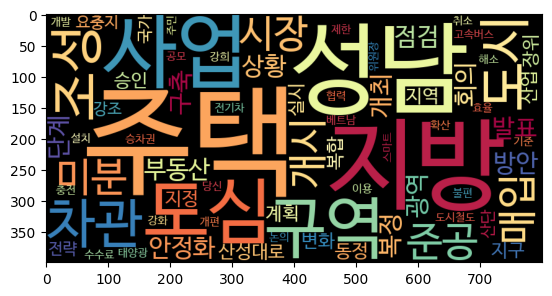

In [15]:
#문자열 분석하기
okt = Okt()
nouns = okt.nouns(title)
words = [n for n in nouns if len(n) > 1]
c = Counter(words)
#워드클라우드 생성하기
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',\
scale=2.0, colormap='Spectral')
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)